In [1]:
import matplotlib.pyplot as plt
import random
from operator import itemgetter
import numpy as np

### Algorytm:

In [2]:
def evolutionary_algorithm_minimalization(t_max, 
                                          population_size, 
                                          pop_arg_num, 
                                          tournament_size, 
                                          elite, 
                                          sigma, 
                                          mutation_prob, 
                                          function_to_minimize):
    
    best_from_epoch = []
    
    P_t = init_population(population_size, pop_arg_num, function_to_minimize)
    t = 0
    x = find_best_individual(P_t)
    while t < t_max:
        R = selection(P_t, tournament_size)
        M = mutation(R, sigma, mutation_prob, function_to_minimize)
        K = recombination(M, function_to_minimize)
        x_t = find_best_individual(K)
        if x_t[-1] < x[-1]:
            x = x_t
        P_t = succession(P_t, K, elite)
        best_from_epoch.append(x_t)
        t += 1
        
    P_t = evaluate(P_t)
    return x, best_from_epoch

#### Inicjalizacja populacji

In [3]:
def init_population(population_size, population_dim, function_to_minimize):
    # last element of point is value of function
    population = []
    # beggining search area is (-5,5) in every dim
    for i in range(population_size):
        point = []
        for j in range(population_dim):
            dim = random.random()*10-5
            point.append(dim)
        value = function_to_minimize(point)
        point.append(value)
            
        population.append(point)
    
    return population

#### Tournament Selection

In [4]:
def selection(P_t, tournament_size):
    R = []
    for o in P_t:
        tournament_participants = random.choices(P_t, k=tournament_size)
        tournament_participants.append(o)
        winner = min(tournament_participants, key=itemgetter(-1))
        R.append(winner)
    return R

#### Mutacja 

In [5]:
def mutation(R, sigma, mutation_prob, function_to_minimize):
    M = []
    for o in R:
        new_o = o
        if random.random()<mutation_prob:
            new_o = []
            for gen in o[:-1]:
                new_gen = gen + sigma*random.gauss(0, 1)
                new_o.append(new_gen)
            new_o_value = function_to_minimize(new_o)
            new_o.append(new_o_value)
        M.append(new_o)
    return M

#### Recombination

In [6]:
def recombination(M, function_to_minimize):

    K = []
    alfa = 0.1
    i = 0
    while i<len(M)-1:
        parent_1 = M[i]
        parent_2 = M[i+1]
        child_1 = []
        child_2 = []
        for j, parent_1_gen in enumerate(parent_1[:-1]):
            parent_2_gen = parent_2[j]
            child_1_gen = alfa * parent_1_gen + (1 - alfa) * parent_2_gen
            child_2_gen = alfa * parent_2_gen + (1 - alfa) * parent_1_gen
            child_1.append(child_1_gen)
            child_2.append(child_2_gen)
        child_1_value = function_to_minimize(child_1)
        child_2_value = function_to_minimize(child_2)
        child_1.append(child_1_value)
        child_2.append(child_2_value)
        K.append(child_1)
        K.append(child_2)
        
        i+=2
    return(K)

In [7]:
def succession(P_t, K, k):
    P_t_1 = K
    elite = find_k_best(P_t, k)
    for e in elite:
        P_t_1.append(e)
    P_t_1 = evaluate(P_t_1)
    P_t_1 = P_t_1[:-k]

    return P_t_1

In [8]:
def evaluate(population):
    return sorted(population, key=itemgetter(-1))

In [9]:
def find_k_best(population, k):
    pop = evaluate(population)
    return population[:k]

In [10]:
 def bird_function(args):
    x, y = args
    return np.sin(x)*(np.exp(1-np.cos(y))**2)+np.cos(y)*(np.exp(1-np.sin(x))**2)+(x-y)**2

In [11]:
def find_best_individual(pop):
    return min(pop, key=itemgetter(-1))

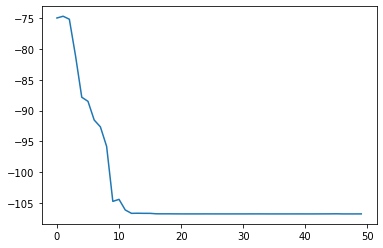

[4.693202108140967, 3.1596705342243285, -106.78768167788512]

In [21]:
t_max = 50
pop_size = 10
pop_arg_num = 2
tournament_size = 2
elite = 1
sigma = 0.1
mutation_prob = 0.5
function_to_minimize = bird_function

x, best_x_in_epoch = evolutionary_algorithm_minimalization(t_max, 
                                      pop_size,
                                      pop_arg_num,
                                      tournament_size,
                                      elite, sigma,
                                      mutation_prob,
                                      function_to_minimize)
f_celu1 = []
for x_t in best_x_in_epoch:
    f_celu1.append(x_t[-1])
plt.plot(f_celu1)
plt.show()
x